In [60]:
from keras.models import load_model

In [61]:
model = load_model('cats_and_dogs_small_2.h5')

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [63]:
img_path = '/Users/jackyboy/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [64]:
from keras.preprocessing import image 
import numpy as np

In [65]:
img = image.load_img(img_path, target_size=(150, 150))

In [66]:
# 3 colour channels , rgb . (150 , 150 ,3)
img_tensor = image.img_to_array(img)

#Adds a matrix (1 , 150 ,150 ,3)
img_tensor = np.expand_dims(img_tensor, axis=0)

#This is how the model was trained on images
img_tensor /= 255.

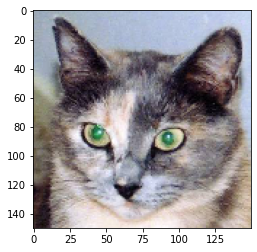

In [67]:
#Test cat picture
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [68]:
from keras import models

#First 8 layers in the model
layer_outputs = [layer.output for layer in model.layers[:8]] 


#input tensors and output tensors
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

<Strong> Displaying what the filter returns in the first layer activation and turining it into an image. </Strong>

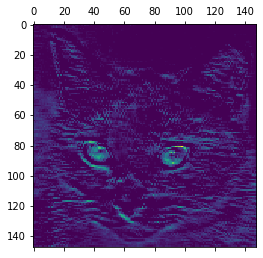

In [82]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

In [131]:
first_layer_activation = activations[0]

print(first_layer_activation.shape)

print(first_layer_activation[0, :, :, 15].shape)

(1, 148, 148, 32)
(148, 148)


In [142]:
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    
    #Number of features in the feature map
    n_features = layer_activation.shape[-1]
    
    #Size of pixels * pixels
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, : col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    
    scale = 1. / size 
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
            
            
            

/var/folders/_f/jpr9q2w52wzg1v439ryj1bk00000gn/T/ipykernel_82721/2216739930.py:23: RuntimeWarning: Mean of empty slice.
  channel_image -= channel_image.mean()


ValueError: could not broadcast input array from shape (148,0,32) into shape (148,148)